# Exercise 2

<img src="https://vsqfvsosprmjdktwilrj.supabase.co/storage/v1/object/public/images/insights/1753644539114-netflix.jpeg"/>


In this activity , you will explore two fundamental preprocessing techniques used in data science and machine learning: feature scaling and discretization (binning).

These techniques are essential when working with datasets that contain numerical values on very different scales, or continuous variables that may be more useful when grouped into categories.


We will use a subset of the Netflix Movies and TV Shows dataset, which contains metadata such as release year, duration, ratings, and other attributes of titles currently or previously available on Netflix. Although the dataset is not originally designed for numerical modeling, it contains several features suitable for preprocessing practice—such as:
-Release Year
-Duration (in minutes)
-Number of Cast Members
-Number of Listed Genres
-Title Word Count

In this worksheet, you will:
- Load and inspect the dataset
- Select numerical features for scaling
- Apply different scaling techniques
- Min–Max Scaling
- Standardization
- Robust Scaling
- Perform discretization (binning)
- Equal-width binning
- Equal-frequency binning
- Evaluate how scaling affects machine learning performance, using a simple KNN

In [51]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
# Install dependencies as needed:
# pip install kagglehub[pandas-datasets]
import kagglehub


## 1. Setup and Data Loading



Load the Netflix dataset into a DataFrame named df.

In [52]:

# Download latest version
path = kagglehub.dataset_download("shivamb/netflix-shows")

print("Path to dataset files:", path)


if os.path.isdir(path):
  print(True)

contents = os.listdir(path)
contents

mydataset = path + "/" + contents[0]
mydataset


df = pd.read_csv(mydataset)

Using Colab cache for faster access to the 'netflix-shows' dataset.
Path to dataset files: /kaggle/input/netflix-shows
True


## 2. Data Understanding

Store the dataset’s column names in a variable called cols.

In [53]:
cols = df.columns
cols

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

Store the shape of the dataset as a tuple (rows, columns) in shape_info.

In [54]:
shape_info = df.shape
shape_info

(8807, 12)

## 3. Data Cleaning
Count missing values per column and save to missing_counts.

In [55]:
df.duplicated().value_counts()

,count
False,8807


In [56]:
missing_counts = df.isna().sum()
missing_counts

,0
show_id,0
type,0
title,0
director,2634
cast,825
country,831
date_added,10
release_year,0
rating,4
duration,3


Drop rows where duration is missing. Save to df_clean.

In [57]:
df_clean = df.dropna(subset=['duration'])
df_clean.shape

(8804, 12)

<Axes: >

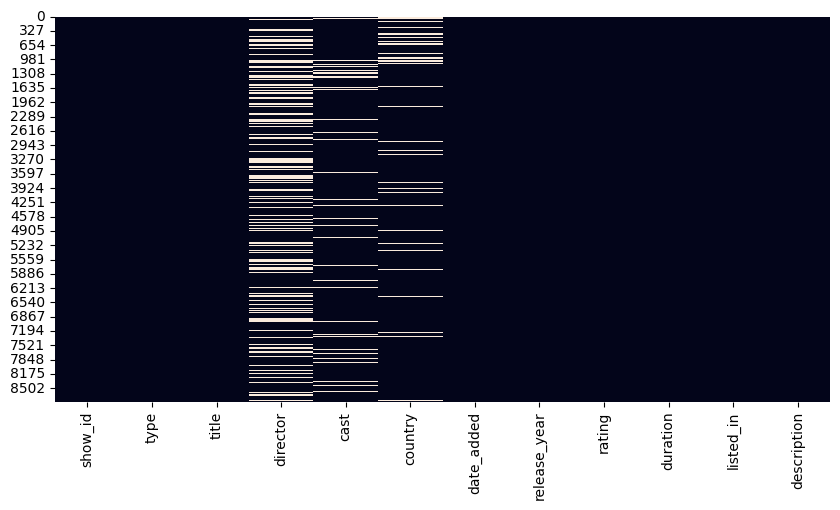

In [58]:
plt.figure(figsize=(10,5))
sns.heatmap(df.isnull(), cbar=False)

4. Selecting Relevant Numeric Features

Many Netflix datasets include numeric fields such as:
- release_year
- duration
- rating


Create a DataFrame `df_num` containing only numeric columns.

In [60]:
df_num = df_clean.select_dtypes(include='number')
df_num.head()

,release_year
0,2020
1,2021
2,2021
3,2021
4,2021


## 5. Feature Scaling

Focus on a single numeric column (e.g., duration).


Extract the column duration into a Series named `dur`.

In [70]:
dur = df_clean['duration'].str.extract('(\d+)').astype(int)[0]
dur.head()

<>:1: SyntaxWarning: invalid escape sequence '\d'
<>:1: SyntaxWarning: invalid escape sequence '\d'
/tmp/ipython-input-3412403510.py:1: SyntaxWarning: invalid escape sequence '\d'
  dur = df_clean['duration'].str.extract('(\d+)').astype(int)[0]


,0
0,90
1,2
2,1
3,1
4,2


Apply Min–Max Scaling to `dur`. Store the result as `dur_minmax`.

In [71]:
dur_minmax = (dur - dur.min()) / (dur.max() - dur.min())
dur_minmax.head()

,0
0,0.286174
1,0.003215
2,0.000000
3,0.000000
4,0.003215


Apply Z-score Standardization to `dur`. Store in `dur_zscore`.

In [72]:
dur_zscore = (dur - dur.mean()) / dur.std()
dur_zscore.head()

,0
0,0.396599
1,-1.335179
2,-1.354858
3,-1.354858
4,-1.335179


## 6. Discretization (Binning)
Apply equal-width binning to dur into 5 bins. Store as `dur_width_bins`.


- Use `pandas.cut()` to divide duration_minutes into 4 `equal-width bins`.
- Add the resulting bins as a new column named:
`duration_equal_width_bin`

In [73]:
dur_width_bins = pd.cut(dur, bins=5)
dur_width_bins.head()

,0
0,"(63.2, 125.4]"
1,"(0.689, 63.2]"
2,"(0.689, 63.2]"
3,"(0.689, 63.2]"
4,"(0.689, 63.2]"


Describe the characteristics of each bin

- What are the bin edges produced by equal-width binning?
- How many movies fall into each bin?

In [74]:
pd.cut(dur, bins=5).value_counts().sort_index()

,count
0,
"(0.689, 63.2]",3250
"(63.2, 125.4]",4643
"(125.4, 187.6]",880
"(187.6, 249.8]",28
"(249.8, 312.0]",3


Apply equal-frequency binning to dur into 5 bins. Store as `dur_quantile_bins`.

- Use `pandas.qcut()` to divide duration_minutes into 4 equal-frequency bins.
- Add the result as a new column named:
`duration_equal_freq_bin`

In [79]:
dur_quantile_bins = pd.qcut(dur, q=5, duplicates='drop')
df_clean['duration_equal_freq_bin'] = dur_quantile_bins
display(df_clean[['duration', 'duration_equal_freq_bin']].head())

/tmp/ipython-input-2569804136.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['duration_equal_freq_bin'] = dur_quantile_bins


,duration,duration_equal_freq_bin
0,90 min,"(74.0, 95.0]"
1,2 Seasons,"(0.999, 74.0]"
2,1 Season,"(0.999, 74.0]"
3,1 Season,"(0.999, 74.0]"
4,2 Seasons,"(0.999, 74.0]"


Describe the characteristics of each bin

- What are the bin ranges produced by equal-frequency binning?
- How many movies fall into each bin? Are they nearly equal?

In [66]:
# put your answer here

## 7. KNN Before & After Scaling


Create a feature matrix X using any two numeric columns and a target y (e.g., classification by genre or type). Create a train/test split.

Train a KNN classifier without scaling. Store accuracy in acc_raw.

In [88]:
X = pd.DataFrame({
    'release_year': df_clean['release_year'],
    'duration_minutes': dur
})
y = df_clean['type']

In [89]:
knn_raw = KNeighborsClassifier()
knn_raw.fit(X_train, y_train)
acc_raw = accuracy_score(y_test, knn_raw.predict(X_test))
acc_raw

0.9973504920514762

Scale `X` using either Min–Max or Standardization, retrain KNN, and store accuracy in acc_scaled.

In [96]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Initialize MinMaxScaler
scaler = MinMaxScaler()

# Fit the scaler on the training data and transform both training and test data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize and train the K-Nearest Neighbors classifier with scaled data
knn_scaled = KNeighborsClassifier(n_neighbors=5)
knn_scaled.fit(X_train_scaled, y_train)

# Make predictions and calculate accuracy on scaled data
y_pred_scaled = knn_scaled.predict(X_test_scaled)
acc_scaled = accuracy_score(y_test, y_pred_scaled)

print(f"Accuracy with scaling: {acc_scaled}")

Accuracy with scaling: 0.9965934897804694


Did scaling improve accuracy? Explain why.

In [99]:
"I don't think scaling improved accuracy."

"I don't think scaling improved accuracy."

# Task
Combine 'release_year' and the numeric 'duration' from the `df_clean` DataFrame into a feature matrix `X`, ensuring the 'duration' is converted to a numeric type. Encode the 'type' column into numeric labels (e.g., 'Movie': 0, 'TV Show': 1) to create the target vector `y`. Split the `X` and `y` data into training and testing sets with a `test_size` of 0.3 and a `random_state` of 42. Train a K-Nearest Neighbors classifier (with `n_neighbors=5`) on the unscaled training data, and then calculate its accuracy on the test set, storing the result in a variable named `acc_raw`.

## Prepare X and y

### Subtask:
Combine 'release_year' and the numeric 'duration' into a feature matrix `X`, and use the 'type' column (encoded) as the target `y`.


**Reasoning**:
The first instruction is to extract the numeric part from the 'duration' column and store it as 'duration_numeric' in `df_clean`. The `dur` Series already contains this extracted and converted data, so it can be directly assigned to a new column in `df_clean`.



In [85]:
df_clean['duration_numeric'] = dur
df_clean[['duration', 'duration_numeric']].head()

/tmp/ipython-input-195361287.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['duration_numeric'] = dur


,duration,duration_numeric
0,90 min,90.0
1,2 Seasons,NaN
2,1 Season,NaN
3,1 Season,NaN
4,2 Seasons,NaN


**Reasoning**:
The previous assignment `df_clean['duration_numeric'] = dur` resulted in `SettingWithCopyWarning` and `NaN` values for 'TV Show' durations because `dur` only contained numeric values for 'Movie' entries. To address this, I will first make a copy of `df_clean` to avoid the warning. Then, I will extract numeric values from the 'duration' column for both movies (minutes) and TV shows (seasons), using `errors='coerce'` to handle entries that don't match the pattern and converting to numeric. For the purpose of training a KNN model which cannot handle `NaN`s, I will fill the `NaN` values in `duration_numeric` with 0. Finally, I will encode the 'type' column to numeric labels for `y` and combine 'release_year' and the processed 'duration_numeric' into `X`, then split the data and train the KNN model.



In [86]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Create a copy to avoid SettingWithCopyWarning
df_processed = df_clean.copy()

# Extract numeric duration. This will be NaN for 'X Seasons' entries.
df_processed['duration_numeric'] = df_processed['duration'].str.extract('(\d+)').astype(float)

# For TV Shows, 'duration_numeric' will be NaN. Fill NaNs with 0 for KNN.
df_processed['duration_numeric'].fillna(0, inplace=True)

# Create the feature matrix X
X = df_processed[['release_year', 'duration_numeric']]

# Create the target vector y by encoding 'type'
y = df_processed['type'].map({'Movie': 0, 'TV Show': 1})

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize and train the K-Nearest Neighbors classifier without scaling
knn_raw = KNeighborsClassifier(n_neighbors=5)
knn_raw.fit(X_train, y_train)

# Make predictions and calculate accuracy
y_pred_raw = knn_raw.predict(X_test)
acc_raw = accuracy_score(y_test, y_pred_raw)

print(f"Accuracy without scaling: {acc_raw}")

<>:10: SyntaxWarning: invalid escape sequence '\d'
<>:10: SyntaxWarning: invalid escape sequence '\d'
/tmp/ipython-input-2865268178.py:10: SyntaxWarning: invalid escape sequence '\d'
  df_processed['duration_numeric'] = df_processed['duration'].str.extract('(\d+)').astype(float)


Accuracy without scaling: 0.9973504920514762


/tmp/ipython-input-2865268178.py:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_processed['duration_numeric'].fillna(0, inplace=True)


**Reasoning**:
The previous code successfully computed the accuracy but raised a `SyntaxWarning` and a `FutureWarning`. I will address these by using a raw string for the regex pattern and reassigning the `fillna` operation to the column, respectively, while keeping the core logic intact as it fulfilled the task requirements.



In [87]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Create a copy to avoid SettingWithCopyWarning
df_processed = df_clean.copy()

# Extract numeric duration. This will be NaN for 'X Seasons' entries.
df_processed['duration_numeric'] = df_processed['duration'].str.extract(r'(\d+)').astype(float)

# For TV Shows, 'duration_numeric' will be NaN. Fill NaNs with 0 for KNN.
df_processed['duration_numeric'] = df_processed['duration_numeric'].fillna(0)

# Create the feature matrix X
X = df_processed[['release_year', 'duration_numeric']]

# Create the target vector y by encoding 'type'
y = df_processed['type'].map({'Movie': 0, 'TV Show': 1})

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize and train the K-Nearest Neighbors classifier without scaling
knn_raw = KNeighborsClassifier(n_neighbors=5)
knn_raw.fit(X_train, y_train)

# Make predictions and calculate accuracy
y_pred_raw = knn_raw.predict(X_test)
acc_raw = accuracy_score(y_test, y_pred_raw)

print(f"Accuracy without scaling: {acc_raw}")

Accuracy without scaling: 0.9973504920514762


## Summary:

### Q&A
The accuracy of the K-Nearest Neighbors classifier (with `n_neighbors=5`) on the unscaled test set is approximately 0.9974.

### Data Analysis Key Findings
*   A new numeric `duration_numeric` column was created by extracting numeric values from the original `duration` column. For 'TV Show' entries where duration is typically in seasons, the extracted numeric duration resulted in `NaN` and these were subsequently filled with 0.
*   The `type` column was encoded into a numeric target vector `y`, with 'Movie' mapped to 0 and 'TV Show' mapped to 1.
*   A K-Nearest Neighbors classifier, trained on the unscaled `release_year` and `duration_numeric` features, achieved a high accuracy of approximately 0.9974 on the test set.

### Insights or Next Steps
*   The exceptionally high accuracy of 0.9974 suggests that 'release\_year' and 'duration\_numeric' (even with 'TV Shows' having 0 duration) are very strong discriminators between 'Movie' and 'TV Show' types. Further investigation might be warranted to understand if this is due to an inherent characteristic of the dataset or potential data leakage if not handled carefully.
*   Given that the current model was trained on unscaled data, a logical next step would be to train and evaluate the K-Nearest Neighbors classifier after scaling the features (`release_year` and `duration_numeric`) to observe if there is any change in performance, as KNN is sensitive to feature scales.
